<a href="https://colab.research.google.com/github/Jenil020/python/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load it using the correct filename
df = pd.read_csv('test.csv')


Saving test.csv to test (6).csv


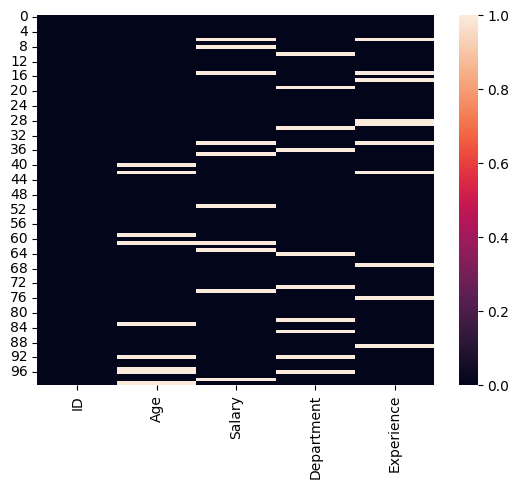

In [17]:
df.isnull().sum() # count all null values
(df.isnull().sum().sum()/df.shape[0]*df.shape[1])*100 # how many percent null values contain in each coloumn
sns.heatmap(df.isnull()) # null values plot
plt.show()

,ID,Age,Salary,Department,Experience
0,1,32.5,500000.00,Tech,6.0
1,2,99.0,46634.84,Tech,6.7
2,3,33.2,47258.28,HR,40.0
3,4,37.6,43581.78,Admin,4.3
4,5,28.8,48709.71,HR,4.1


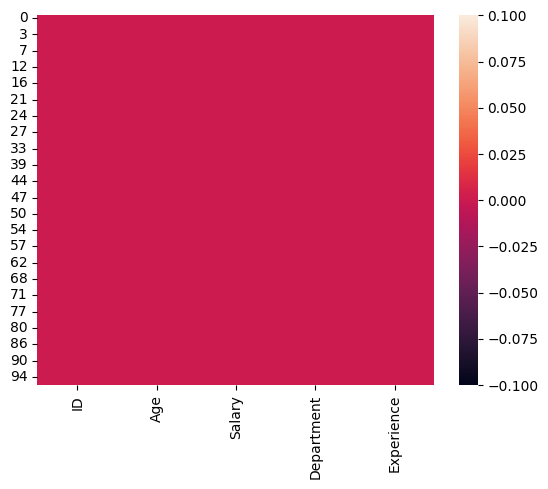

In [23]:
df.dropna(inplace=True) #remove all rows which take null values
display(df.head(5))
sns.heatmap(df.isnull())
plt.show()

In [28]:
df['Age'].mode()[0]
df['Age'] = df['Age'].fillna(df['Age'].mode()[0]) #fill only age coloumns missing values
df.isnull().sum()

,0
ID,0
Age,0
Salary,0
Department,0
Experience,0


In [25]:
#fill missing value
df.fillna(method="ffill") #forward filling missing value row wise
df.fillna(method="bfill") #backward filling missing value row wise
df.fillna(method="ffill",axis=1) #forward filling missing value column wise
df.fillna(method="bfill",axis=1) #backward filling missing value column wise

/tmp/ipython-input-25-3559784914.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill") #forward filling missing value row wise


,ID,Age,Salary,Department,Experience
0,1,32.5,500000.00,Tech,6.0
1,2,99.0,46634.84,Tech,6.7
2,3,33.2,47258.28,HR,40.0
3,4,37.6,43581.78,Admin,4.3
4,5,28.8,48709.71,HR,4.1
...,...,...,...,...,...
90,91,30.5,46427.88,Finance,5.2
91,92,34.8,56851.19,Finance,3.6
93,94,28.4,40034.09,Tech,4.7
94,95,28.0,51385.45,Finance,3.3


In [31]:
df.info()
df.select_dtypes(include="object").columns #object type data contains


<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0 to 97
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          68 non-null     int64  
 1   Age         68 non-null     float64
 2   Salary      68 non-null     float64
 3   Department  68 non-null     object 
 4   Experience  68 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.2+ KB


Index(['Department'], dtype='object')

In [36]:
from sklearn.impute import SimpleImputer

# Create the imputer to fill missing categorical values with the most frequent value
si = SimpleImputer(strategy="most_frequent")

# Get all categorical columns (object dtype)
categorical_columns = df.select_dtypes(include="object").columns

# Fit and transform those columns
df[categorical_columns] = si.fit_transform(df[categorical_columns])

display(df[categorical_columns])


,Department
0,Tech
1,Tech
2,HR
3,Admin
4,HR
...,...
90,Finance
91,Finance
93,Tech
94,Finance
